In [1]:
import numpy as np
import pandas as pd
np.set_printoptions(threshold=np.nan)
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
%pylab inline
exec(open("/Users/raghuramkowdeed/Documents/afp/get_signal_names.py").read())
exec(open("/Users/raghuramkowdeed/Documents/afp/portfolio_optimizer.py").read())
exec(open("/Users/raghuramkowdeed/Documents/afp/non_linear_signal.py").read())
import datetime
from pylab import rcParams


Populating the interactive namespace from numpy and matplotlib


In [2]:
sig_dir = '/Users/raghuramkowdeed/Desktop/afp_data/1000/ranked_rps_data/'
#sig_dir = '/Users/raghuramkowdeed/Desktop/afp_data/1000/norm_rps_data/'

In [3]:
sig_df = pd.DataFrame()
sig_files = os.listdir(sig_dir)
sig_files = np.sort(sig_files)

for sig_file in sig_files :
    if '.csv' not in sig_file :
        continue
    #print(sig_file)
    this_file = sig_dir + sig_file
    this_df = pd.read_csv(this_file, index_col = 'date')
    this_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d') for val in this_df.index]
    sig_df = sig_df.append(this_df)
    

In [4]:
begin_date = datetime.datetime.strptime('19900101', '%Y%m%d')
end_date = datetime.datetime.strptime('20170101', '%Y%m%d')

sig_df = sig_df[(sig_df.index>=begin_date) & (sig_df.index<end_date)]
sig_df = sig_df.fillna(sig_df.mean())

In [5]:
'res_ret' in sig_df.columns

True

In [6]:
factor_names =  ['beta','mve', 'bm', 'roic', 'agr', 'mom12m', 'idiovol']
#factor_names =  ['beta']
sig_names = get_signal_names()
ret = sig_df['ret']
sig_df = sig_df[sig_names]
sig_df = sig_df.drop(factor_names, axis=1)

In [7]:
'res_ret' in sig_df.columns

False

In [9]:

pm = PortfolioOptimizer(fac_data_dir='/Users/raghuramkowdeed/Desktop/afp_data/1000/factor_exposure_data/',
                        fac_ret_file = '/Users/raghuramkowdeed/Desktop/afp_data/1000/fac_ret_file.csv',
                        fac_cov_hl = 12.0,
                        fac_names = None
                       )



--------


In [10]:
#new_sig_df = pd.DataFrame()

#for sig_name in sig_df.columns :
#    this_sig = sig_df[sig_name]
#    this_sig = pm.neu_signal(this_sig)
#    this_sig = this_sig.fillna(this_sig.mean())
#    new_sig_df[sig_name] = this_sig
#sig_df = new_sig_df

In [11]:
np.where( sig_df.isnull().any() ) [0]

array([], dtype=int64)

In [12]:
num_sig_vec = range(5,80,5)

In [13]:
glm_sig_df, sig_names = get_glmnet_sig(sig_df, ret, look_back = 12,num_sig_vec = num_sig_vec, alpha = 0.5 )


inside
1991-01-31 00:00:00
1991-02-28 00:00:00
1991-03-28 00:00:00
1991-04-30 00:00:00
1991-05-31 00:00:00
1991-06-28 00:00:00
1991-07-31 00:00:00
1991-08-30 00:00:00
1991-09-30 00:00:00
1991-10-31 00:00:00
1991-11-29 00:00:00
1991-12-31 00:00:00
1992-01-31 00:00:00
1992-02-28 00:00:00
1992-03-31 00:00:00
1992-04-30 00:00:00
1992-05-29 00:00:00
1992-06-30 00:00:00
1992-07-31 00:00:00
1992-08-31 00:00:00
1992-09-30 00:00:00
1992-10-30 00:00:00
1992-11-30 00:00:00
1992-12-31 00:00:00
1993-01-29 00:00:00
1993-02-26 00:00:00
1993-03-31 00:00:00
1993-04-30 00:00:00
1993-05-28 00:00:00
1993-06-30 00:00:00
1993-07-30 00:00:00
1993-08-31 00:00:00
1993-09-30 00:00:00
1993-10-29 00:00:00
1993-11-30 00:00:00
1993-12-31 00:00:00
1994-01-31 00:00:00
1994-02-28 00:00:00
1994-03-31 00:00:00
1994-04-29 00:00:00
1994-05-31 00:00:00
1994-06-30 00:00:00
1994-07-29 00:00:00
1994-08-31 00:00:00
1994-09-30 00:00:00
1994-10-31 00:00:00
1994-11-30 00:00:00
1994-12-30 00:00:00
1995-01-31 00:00:00
1995-02-28 00

In [14]:
pnl_df = pd.DataFrame()
for i in range( glm_sig_df.shape[1]):
    print(i)
    glm_pnl_sr = pm.run_signal(sig_sr=glm_sig_df.iloc[:,i],neu_sig=True)
    pnl_df[num_sig_vec[i]] = glm_pnl_sr

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


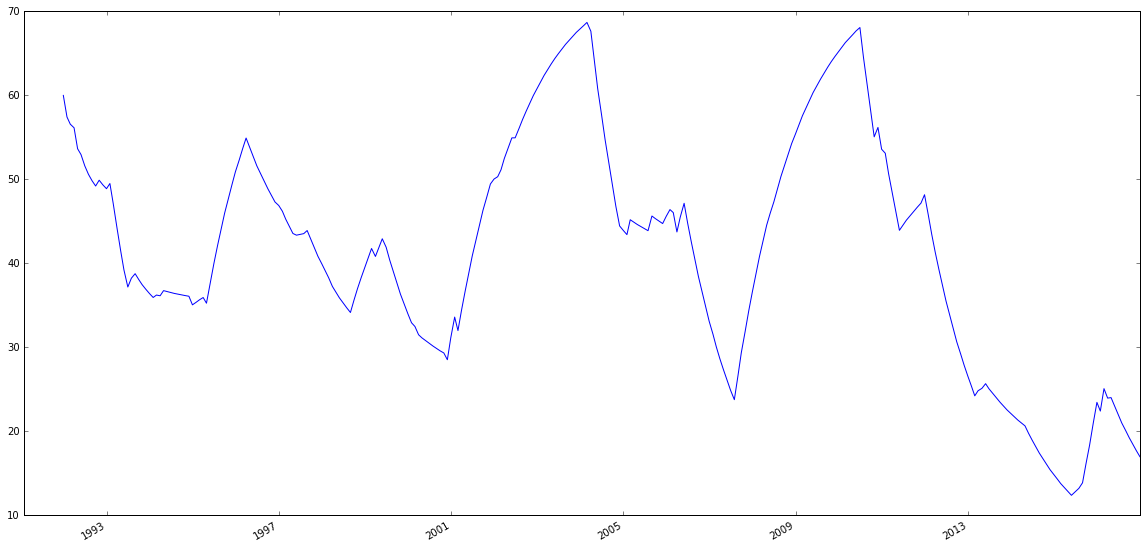

In [17]:
window = 12
#pnl_df_avg = ( pnl_df.rolling(window=window).mean()*sqrt(12) ) /( pnl_df.rolling(window=window).std() )
pnl_df_avg = ( pnl_df.rolling(window=window).mean()*sqrt(12) )    
max_ind = pnl_df_avg.idxmax(axis=1)
min_ind = pnl_df_avg.idxmin(axis=1)
max_ind_smt = max_ind.ewm(halflife=window).mean()

rcParams['figure.figsize'] = 20,10
max_ind_smt.plot()

In [16]:
pnl_df.mean(axis=0)*sqrt(12)/pnl_df.std(axis=0)

5     0.535944
10    0.740387
15    0.891946
20    0.943931
25    0.999642
30    1.024219
35    1.051922
40    1.062691
45    1.080833
50    1.093817
55    1.114764
60    1.129839
65    1.139118
70    1.150864
75    1.162698
dtype: float64

In [9]:
l_sig_df = pd.read_csv('/Users/raghuramkowdeed/Desktop/afp_data/1000/l_sig_df_3.csv', index_col = 'date')
l_sig_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d') for val in l_sig_df.index]
l_sig_df = l_sig_df[(l_sig_df.index>=begin_date) & (l_sig_df.index<end_date)]
l_sig_df = l_sig_df.drop(factor_names, axis=1)

nl_knn_sig_df = pd.read_csv('/Users/raghuramkowdeed/Desktop/afp_data/1000/nl_knn_sig_df_3.csv', index_col = 'date')
nl_knn_sig_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d') for val in nl_knn_sig_df.index]
nl_knn_sig_df = nl_knn_sig_df[(nl_knn_sig_df.index>=begin_date) & (nl_knn_sig_df.index<end_date)]
nl_knn_sig_df = nl_knn_sig_df.drop(factor_names, axis=1)


In [10]:
l_sig_rank_df = l_sig_df.copy()
nl_knn_sig_rank_df = nl_knn_sig_df.copy()

for ind in (l_sig_df.index.unique()) :
    l_sig_rank_df.loc[ind] = (l_sig_df.loc[ind]).rank(axis=0)

for ind in (nl_knn_sig_df.index.unique()) :
    nl_knn_sig_rank_df.loc[ind] = (nl_knn_sig_df.loc[ind]).rank(axis=0)
    



inside
0.175230878205


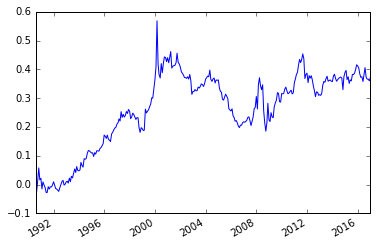

In [11]:
ret_sr = ret[ ( ret.index>=l_sig_df.index[0] ) &  ( ret.index<=l_sig_df.index[-1] )]
glm_sig_df = get_glmnet_sig(l_sig_rank_df, ret_sr, look_back = 3,num_sig_vec =num_sig_vec, alpha = 0.5 )
glm_pnl_sr = pm.run_signal(sig_sr=glm_sig_df.iloc[:,1],neu_sig=True)
glm_pnl_sr.cumsum().plot()
print(glm_pnl_sr.mean()*sqrt(12)/glm_pnl_sr.std() )

inside
0.165418709591


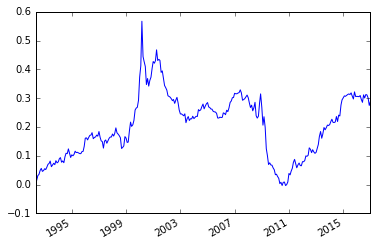

In [14]:
ret_sr = ret[ ( ret.index>=nl_knn_sig_df.index[0] ) &  ( ret.index<=nl_knn_sig_df.index[-1] )]

glm_sig_df = get_glmnet_sig(nl_knn_sig_rank_df, ret_sr, look_back = 24,num_sig_vec =num_sig_vec, alpha = 0.5 )
glm_pnl_sr = pm.run_signal(sig_sr=glm_sig_df.iloc[:,1],neu_sig=True)
glm_pnl_sr.cumsum().plot()
print(glm_pnl_sr.mean()*sqrt(12)/glm_pnl_sr.std() )

1.1835056559


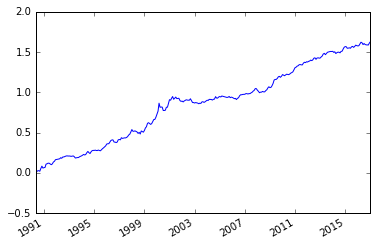

In [15]:
ret_sr = ret[ ( ret.index>=nl_knn_sig_df.index[0] ) &  ( ret.index<=nl_knn_sig_df.index[-1] )]
best_sig_names = ['sfe', 'lev', 'fgr5yr']
best_sig_sr = nl_knn_sig_rank_df[best_sig_names].mean(axis=1)

glm_pnl_sr = pm.run_signal(sig_sr=best_sig_sr,neu_sig=True)
glm_pnl_sr.cumsum().plot()
print(glm_pnl_sr.mean()*sqrt(12)/glm_pnl_sr.std() )

In [14]:
sig_df.columns[[11,52, 69, 84, 85]]

Index(['cfp_ia', 'indmom', 'saleinv', 'roaq', 'roavol'], dtype='object')

In [64]:
model = ElasticNet?

In [ ]:
model = ElasticNet